In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [125]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs
        self.weigths = None
        self.predictions = []

    def train(self, x, y):
        num_samples = len(y)
        self.predictions = np.ones(num_samples)
        # Add a 1 to each sample for the "Bias" and turn into a numpy array
        x['0'] = 1
        x = x.to_numpy()
        y = y.to_numpy()
        # # print(x)
        num_of_features = len(x[0])
        # Initialize weigths
        self.weigths = np.random.rand(num_of_features)
        # print("Initial weights: [" + str(self.weigths) + "]")
        # print("Labels: " + str(y))
        num_correct_pred = 0
        while num_correct_pred < num_samples:
            # print("\n### Iteration step " + j + " ###")
            # Iterate over all samples
            for i in range(0, num_samples):
                pred = self.predict(x[i])
                # If the prediction is incorrect
                if pred != y[i]:
                    if y[i] == 1:
                        self.weigths = np.add(self.weigths, x[i])
                    else:
                        self.weigths = np.subtract(self.weigths, x[i])
                    print("The prediction was: " + str(pred) + " but the actual label was: " + str(y[i]) + ". The new weigths are: " + str(self.weigths))
                self.predictions[i] = pred
            # print("Predicitons: " + str(self.predictions))
            # print("Weights: [" + str(self.weigths) + "]")
            num_correct_pred = np.sum(np.array(self.predictions) == y)
            print("How many elements are equal: " + str(num_correct_pred) + "\n")
            # print(np.sum(self.predictions== y))
        

    def predict(self, x):
        pred = np.sign(np.dot(x, self.weigths))
        # print("Dotproduct of " + str(x) + " and " + str(self.weigths) + " equals: " + str(pred))
        return pred
    
    def test(self, x, y):
        x['0'] = 1
        x = x.to_numpy()
        y = y.to_numpy()
        num_samples = len(y)
        predictions = np.ones(num_samples)
        for i in range(0, num_samples):
            pred = np.sign(np.dot(x[i], self.weigths))
            predictions[i] = pred
        num_correct_pred = np.sum(np.array(predictions) == y)
        print("How many elements are equal: " + str(num_correct_pred) + "\n")


In [126]:
#Load the Iris dataset into a dataframe
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
# Get the first hundred rows (Cut out the theird lable)
num_samples = 100
df = df.head(num_samples)
df = df.sample(frac = 1)
df.loc[df[4] == 'Iris-setosa', 4] = 1
df.loc[df[4] == 'Iris-versicolor', 4] = -1
# Get the labels and load them in 'y'
y = df[4]
# Get the features to each label
x = df[[1,2]]
# print(x[80:])
num_train = 80
num_test = num_samples - num_train
perceptron = Perceptron()
perceptron.train(x[:num_train], y[:num_train])

The prediction was: 1.0 but the actual label was: -1. The new weigths are: [-1.61848225 -2.85164658 -0.77979488]
The prediction was: -1.0 but the actual label was: 1. The new weigths are: [ 1.88151775 -1.25164658  0.22020512]
The prediction was: 1.0 but the actual label was: -1. The new weigths are: [-1.11848225 -5.45164658 -0.77979488]
The prediction was: -1.0 but the actual label was: 1. The new weigths are: [ 1.88151775 -4.35164658  0.22020512]
The prediction was: -1.0 but the actual label was: 1. The new weigths are: [ 4.18151775 -3.05164658  1.22020512]
The prediction was: 1.0 but the actual label was: -1. The new weigths are: [ 0.98151775 -7.55164658  0.22020512]
The prediction was: -1.0 but the actual label was: 1. The new weigths are: [ 4.38151775 -6.05164658  1.22020512]
How many elements are equal: 73

How many elements are equal: 80



/tmp/ipykernel_6279/4259251286.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['0'] = 1


In [128]:
# Choose experimental data from the dataset
# print(x[num_train:], y[num_train:])
perceptron.test(x[num_train:], y[num_train:])

How many elements are equal: 20



/tmp/ipykernel_6279/4259251286.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['0'] = 1


[(3.5, 1.6), (3.0, 1.1), (3.5, 1.5), (2.3, 1.3), (3.4, 1.5), (3.5, 1.3), (4.4, 1.5), (3.2, 1.6), (3.4, 1.4), (3.9, 1.7), (3.1, 1.5), (3.9, 1.3), (3.5, 1.3), (3.1, 1.5), (3.4, 1.5), (3.0, 1.4), (4.1, 1.5), (3.7, 1.5), (3.3, 1.7), (3.2, 1.4), (3.4, 1.9), (3.4, 1.6), (3.1, 1.5), (3.2, 1.2), (3.8, 1.5), (3.7, 1.5), (3.4, 1.7), (3.8, 1.7), (3.4, 1.6), (3.3, 1.4), (3.1, 1.6), (3.5, 1.4), (3.8, 1.6), (3.1, 1.5), (3.8, 1.9), (3.4, 1.4), (3.2, 1.3), (3.0, 1.4), (3.6, 1.0), (3.0, 1.4), (3.4, 1.5), (3.2, 1.3), (3.7, 1.5), (3.0, 1.3), (4.0, 1.2), (2.9, 1.4), (4.2, 1.4), (3.6, 1.4), (3.5, 1.4), (3.0, 1.6)]


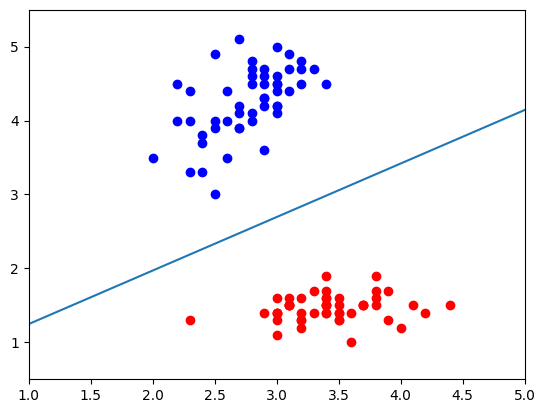

In [162]:
#Visualize results
x_coordinates_1 = df.loc[df[4] == 1, 1].to_numpy()
y_coordinates_1 = df.loc[df[4] == 1, 2].to_numpy()
x_coordinates_2 = df.loc[df[4] == -1, 1].to_numpy()
y_coordinates_2 = df.loc[df[4] == -1, 2].to_numpy()

x = np.linspace(1, 6, 6)
plt.plot((perceptron.weigths[0]/-perceptron.weigths[1])*x + (perceptron.weigths[2] / perceptron.weigths[1]))
print(list(zip(x_coordinates_1, y_coordinates_1)))
plt.plot(x_coordinates_1, y_coordinates_1, 'ro')
plt.plot(x_coordinates_2, y_coordinates_2, 'bo')
plt.ylim([0.5, 5.5])
plt.xlim([1, 5])
plt.show()